##Classificação de Imagens Reais

Baixe o seguinte arquivo: https://www.dropbox.com/s/sofyakylqodcrd3/Digitos.zip?dl=0

Faça o upload desse aquivo para a pasta principal de arquivos do Google Colab

In [ ]:
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D,AveragePooling2D
from keras.preprocessing.image import img_to_array, load_img
import numpy as np
from keras import preprocessing

from keras.callbacks import ModelCheckpoint


In [ ]:
import zipfile

In [ ]:
with zipfile.ZipFile('/content/Digitos.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/Datasets')

In [ ]:
train_datagen = preprocessing.image.ImageDataGenerator(validation_split=0.20)
train_generator = train_datagen.flow_from_directory(
    '/content/Datasets/Digitos/Treinamento',
    batch_size=200,
    color_mode = 'grayscale',
    subset='training',
    target_size=(30, 30))


Found 5473 images belonging to 10 classes.


In [ ]:
valid_generator = train_datagen.flow_from_directory(
    '/content/Datasets/Digitos/Treinamento',
    batch_size=200,
    color_mode = 'grayscale',
    subset='validation',
    target_size=(30, 30))

Found 1363 images belonging to 10 classes.


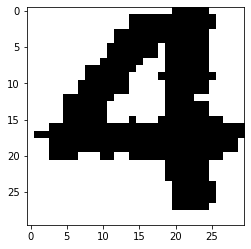

In [ ]:
#Visualizando 
x,y = train_generator.next()
for i in range(0,1):
    image = x[i]   
    plt.imshow(image[:,:,0], cmap=plt.get_cmap('gray'))
    plt.show()

In [ ]:
x.shape

(200, 30, 30, 1)

In [ ]:
image.shape

(30, 30, 1)

In [ ]:
y[0]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
num_classes = 10

STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=valid_generator.n//valid_generator.batch_size


In [ ]:
# Cria o modelo
model = Sequential()
#Convolução 2D com função de ativação Rectified Linear Units 32 kernels/Pesos (filtros) 
model.add(Conv2D(32, (7, 7), input_shape=(30,30,1), activation='relu')) #, data_format='channels_first'
print( model.output_shape)
#Camada de Pooling 	    
model.add(AveragePooling2D(pool_size=(2, 2)))
print( model.output_shape)
	
#Convolução 2D com função de ativação Rectified Linear Units 64 kernels/Pesos (filtros) 
model.add(Conv2D(64, (5, 5), activation='relu'))
print( model.output_shape)
#Camada de Pooling 	
model.add(AveragePooling2D(pool_size=(2, 2)))
print( model.output_shape)

#Convolução 2D com função de ativação Rectified Linear Units 128 kernels/Pesos (filtros) 
model.add(Conv2D(128, (3, 3), activation='relu'))
print( model.output_shape)
#Camada de Pooling 	
model.add(AveragePooling2D(pool_size=(2, 2)))
print( model.output_shape)

#Remove 30% dos dados de entrada aleatoriamente 
model.add(Dropout(0.3))
#Converte o conjunto de imagens e um vetor unidimensional para a entrada da rede neural totalmente conectada
model.add(Flatten())
print( model.output_shape)

model.add(Dense(512, activation='relu'))
print( model.output_shape)
model.add(Dense(128, activation='relu'))
print( model.output_shape)
model.add(Dense(64, activation='relu'))
print( model.output_shape)
model.add(Dense(num_classes, activation='softmax'))
print( model.output_shape)


(None, 24, 24, 32)
(None, 12, 12, 32)
(None, 8, 8, 64)
(None, 4, 4, 64)
(None, 2, 2, 128)
(None, 1, 1, 128)
(None, 128)
(None, 512)
(None, 128)
(None, 64)
(None, 10)


In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
mcp_save = ModelCheckpoint('model_best.h5', monitor='val_accuracy', mode= 'auto', save_weights_only=True, save_best_only=True, verbose =1)
#reduce_lr_loss = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=7, verbose=1, epsilon=1e-4, mode='min')

model.summary()

model.fit_generator(train_generator, 
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=valid_generator,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=10, callbacks=[mcp_save])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 32)        1600      
                                                                 
 average_pooling2d (AverageP  (None, 12, 12, 32)       0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 64)          51264     
                                                                 
 average_pooling2d_1 (Averag  (None, 4, 4, 64)         0         
 ePooling2D)                                                     
                                                                 
 conv2d_2 (Conv2D)           (None, 2, 2, 128)         73856     
                                                                 
 average_pooling2d_2 (Averag  (None, 1, 1, 128)        0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  # Remove the CWD from sys.path while we load stuff.


Epoch 1/10
26/27 [===========================>..] - ETA: 0s - loss: 1.4171 - accuracy: 0.5778
Epoch 1: val_accuracy improved from -inf to 0.96917, saving model to model_best.h5
27/27 [==============================] - 13s 56ms/step - loss: 1.3765 - accuracy: 0.5894 - val_loss: 0.1402 - val_accuracy: 0.9692
Epoch 2/10
26/27 [===========================>..] - ETA: 0s - loss: 0.2043 - accuracy: 0.9296
Epoch 2: val_accuracy improved from 0.96917 to 0.98333, saving model to model_best.h5
27/27 [==============================] - 1s 43ms/step - loss: 0.2012 - accuracy: 0.9312 - val_loss: 0.0578 - val_accuracy: 0.9833
Epoch 3/10
25/27 [==========================>...] - ETA: 0s - loss: 0.0956 - accuracy: 0.9740
Epoch 3: val_accuracy improved from 0.98333 to 0.99500, saving model to model_best.h5
27/27 [==============================] - 1s 43ms/step - loss: 0.0969 - accuracy: 0.9734 - val_loss: 0.0163 - val_accuracy: 0.9950
Epoch 4/10
26/27 [===========================>..] - ETA: 0s - loss: 0.05

In [ ]:
test_datagen = preprocessing.image.ImageDataGenerator()
test_generator = test_datagen.flow_from_directory(
    '/content/Datasets/Digitos/Teste',
    batch_size=1,
    color_mode = 'grayscale',    
    target_size=(30, 30))

Found 73 images belonging to 10 classes.


In [ ]:
scores = model.evaluate_generator(test_generator)   
print(scores)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


[0.0023480448871850967, 1.0]


In [ ]:
predictions = model.predict_generator(test_generator)
print(predictions)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  """Entry point for launching an IPython kernel.


[[1.60736331e-08 7.68552375e-11 9.99785721e-01 9.11243134e-08
  9.04615831e-08 8.98848462e-09 7.37693924e-08 1.26310639e-04
  8.76439808e-05 4.73610413e-08]
 [7.28418126e-09 9.62609690e-08 4.04659373e-09 2.73075660e-08
  2.29282790e-07 2.43384366e-05 3.74408806e-08 3.79229759e-09
  5.43881526e-07 9.99974608e-01]
 [6.68189259e-14 1.33609135e-09 1.00000000e+00 2.74932637e-12
  9.94429105e-12 1.44420240e-12 1.06870973e-15 7.55003526e-09
  2.52439805e-11 4.95851190e-13]
 [9.99999285e-01 1.00510519e-07 6.19991003e-11 1.96446220e-10
  2.58865862e-09 4.18319615e-07 1.35791780e-07 6.20778207e-10
  1.08050169e-09 1.99002902e-12]
 [2.37401923e-06 9.99982476e-01 1.03374714e-06 7.06223045e-06
  7.72011902e-07 1.60654011e-07 2.44531770e-06 3.71250189e-06
  2.33981778e-10 2.98328970e-08]
 [3.51866963e-03 1.20956738e-08 1.68592851e-05 2.08711270e-08
  1.51889344e-06 2.51905061e-03 3.26770314e-05 1.88849700e-08
  9.93836582e-01 7.44814970e-05]
 [6.90029934e-04 9.33460484e-04 7.07097497e-05 2.41348448e

In [ ]:
res1 = np.argmax(predictions[0,:])
print(res1) 

2


Como Fazer a predição de uma imagem PNG?

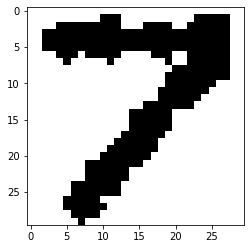

In [ ]:
#fileimg = r'D:\digito_7_2SAN.png'
fileimg = r'/content/Datasets/Digitos/Teste/7/7_8850.png'

img = load_img(fileimg , color_mode = "grayscale", target_size=(30, 30))

#
x = img_to_array(img)

plt.imshow(x[:,:,0], cmap=plt.get_cmap('gray'))
plt.show()

In [ ]:
x.shape

(30, 30, 1)

In [ ]:
x = np.expand_dims(x, axis=0)
x.shape

(1, 30, 30, 1)

In [ ]:
y_pred = model.predict(x)

res = np.argmax(y_pred)
print(res)

7


In [ ]:
y_pred

array([[1.5536102e-13, 1.6503000e-12, 6.8898225e-09, 1.1232152e-12,
        6.0254751e-10, 1.2984253e-19, 5.1712833e-13, 1.0000000e+00,
        9.2017941e-15, 3.8700865e-08]], dtype=float32)

In [ ]:
train_generator.class_indices

{'0': 0,
 '1': 1,
 '2': 2,
 '3': 3,
 '4': 4,
 '5': 5,
 '6': 6,
 '7': 7,
 '8': 8,
 '9': 9}